In [109]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

column_names = ["x", "y", "cluster"]
file_paths = glob.glob("dataset/*.txt")

dfs = {}

for file_path in file_paths:
    file_name = file_path.split("/")[-1].split(".")[0]
    dfs[file_name] = pd.read_csv(file_path, names=column_names)

In [110]:
dfs['blobs'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xs = {}

for key, df in dfs.items():
    X = df.drop('cluster', axis=1)
    Xs[key] = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [112]:
Xs['blobs'].head()

,x,y
0,0.588282,0.787032
1,0.245662,0.664914
2,0.234199,0.460958
3,0.646200,0.555209
4,0.355448,0.762551


In [113]:
def plot_clusters(df, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(df['x'], df['y'], c=df['cluster'])
    plt.title(title)
    plt.show()

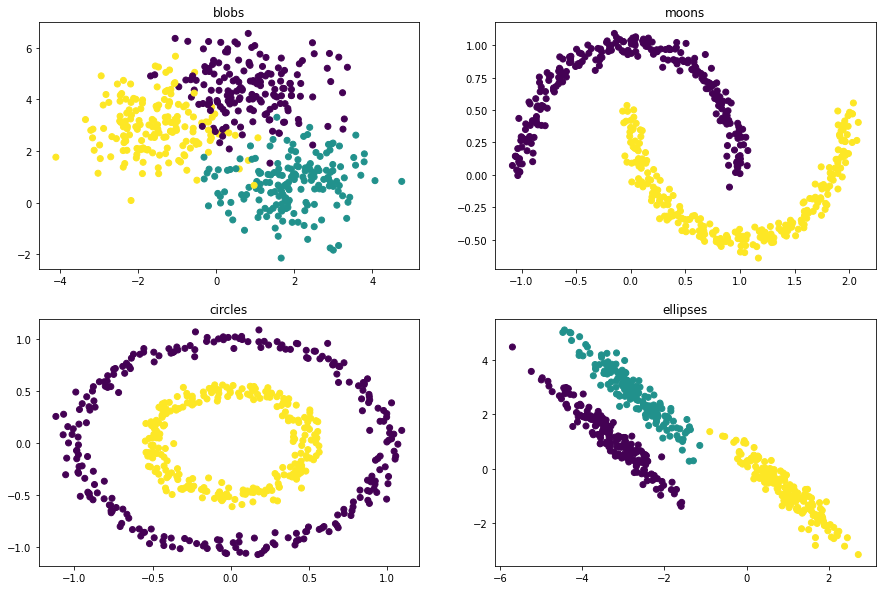

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (key, df) in enumerate(dfs.items()):
    ax = axs[i // 2, i % 2]
    ax.scatter(df['x'], df['y'], c=df['cluster'])
    ax.set_title(key)

In [115]:
def plot_all_clusters(dfs, title):
    plt.figure(figsize=(10, 8))
    for key, df in dfs.items():
        plt.scatter(df['x'], df['y'], label=key)
    plt.title(title)
    plt.legend()
    plt.show()

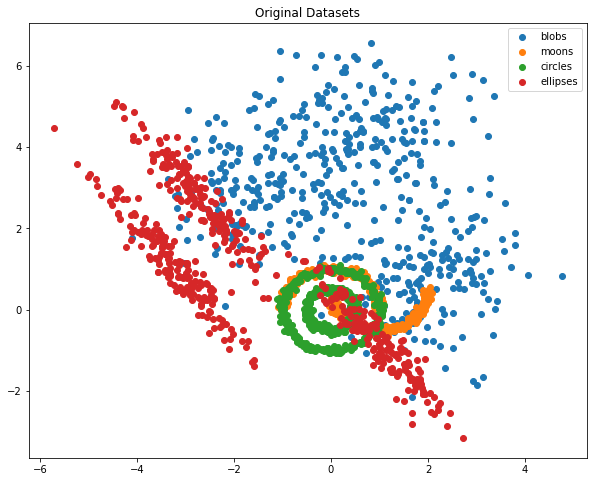

In [116]:
plot_all_clusters(dfs, 'Original Datasets')

In [117]:
from sklearn.cluster import KMeans

def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X['x'], X['y'], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
    plt.title(f'K-Means Clustering with {n_clusters} clusters')
    plt.show()

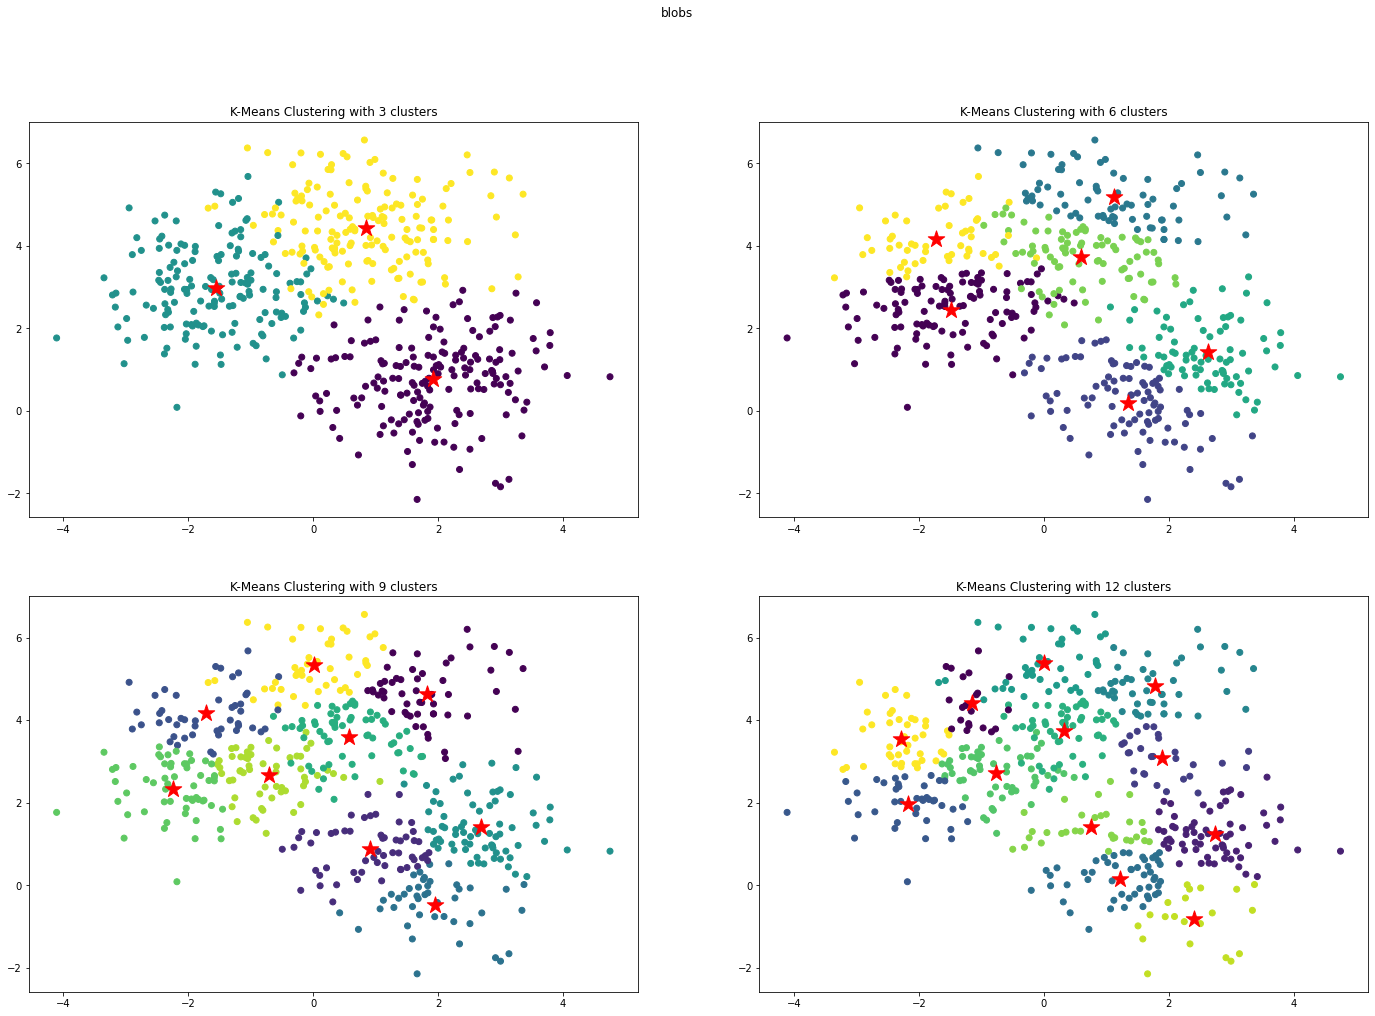

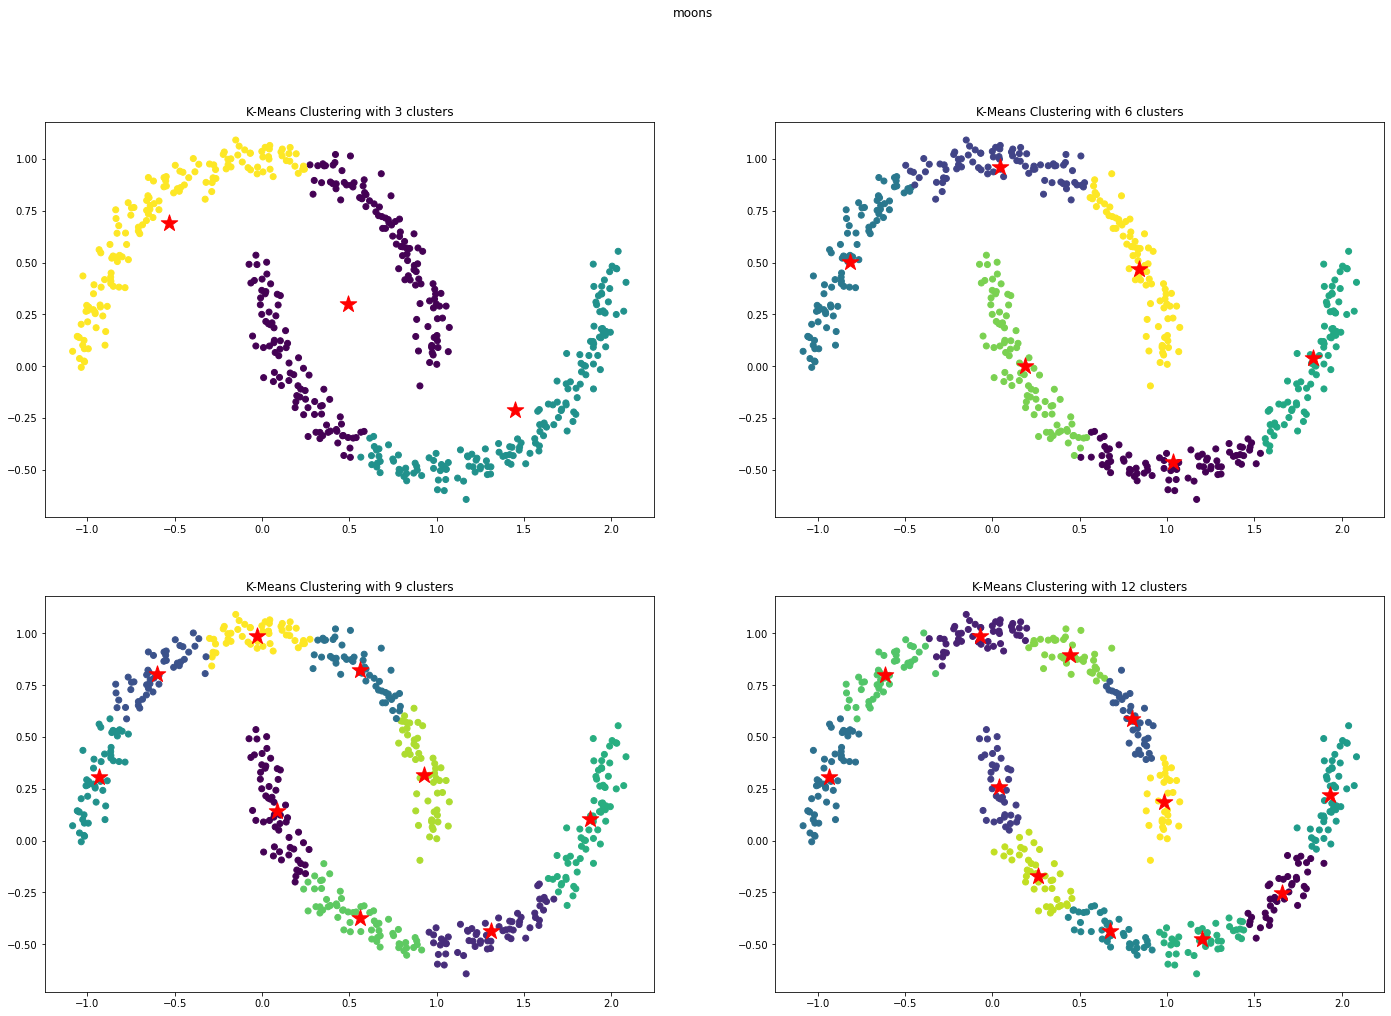

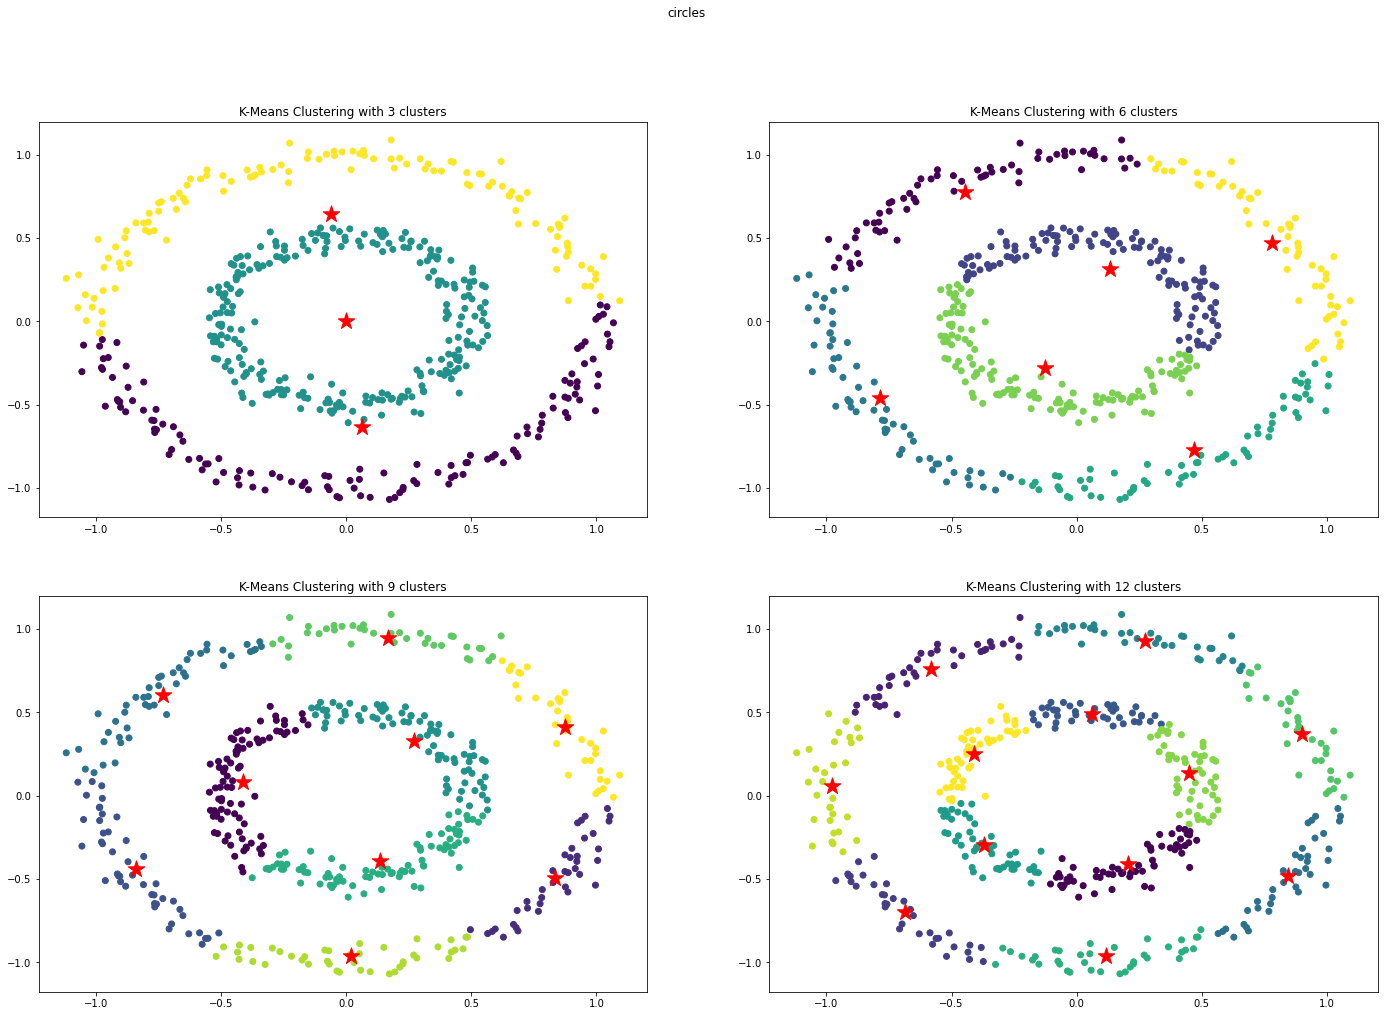

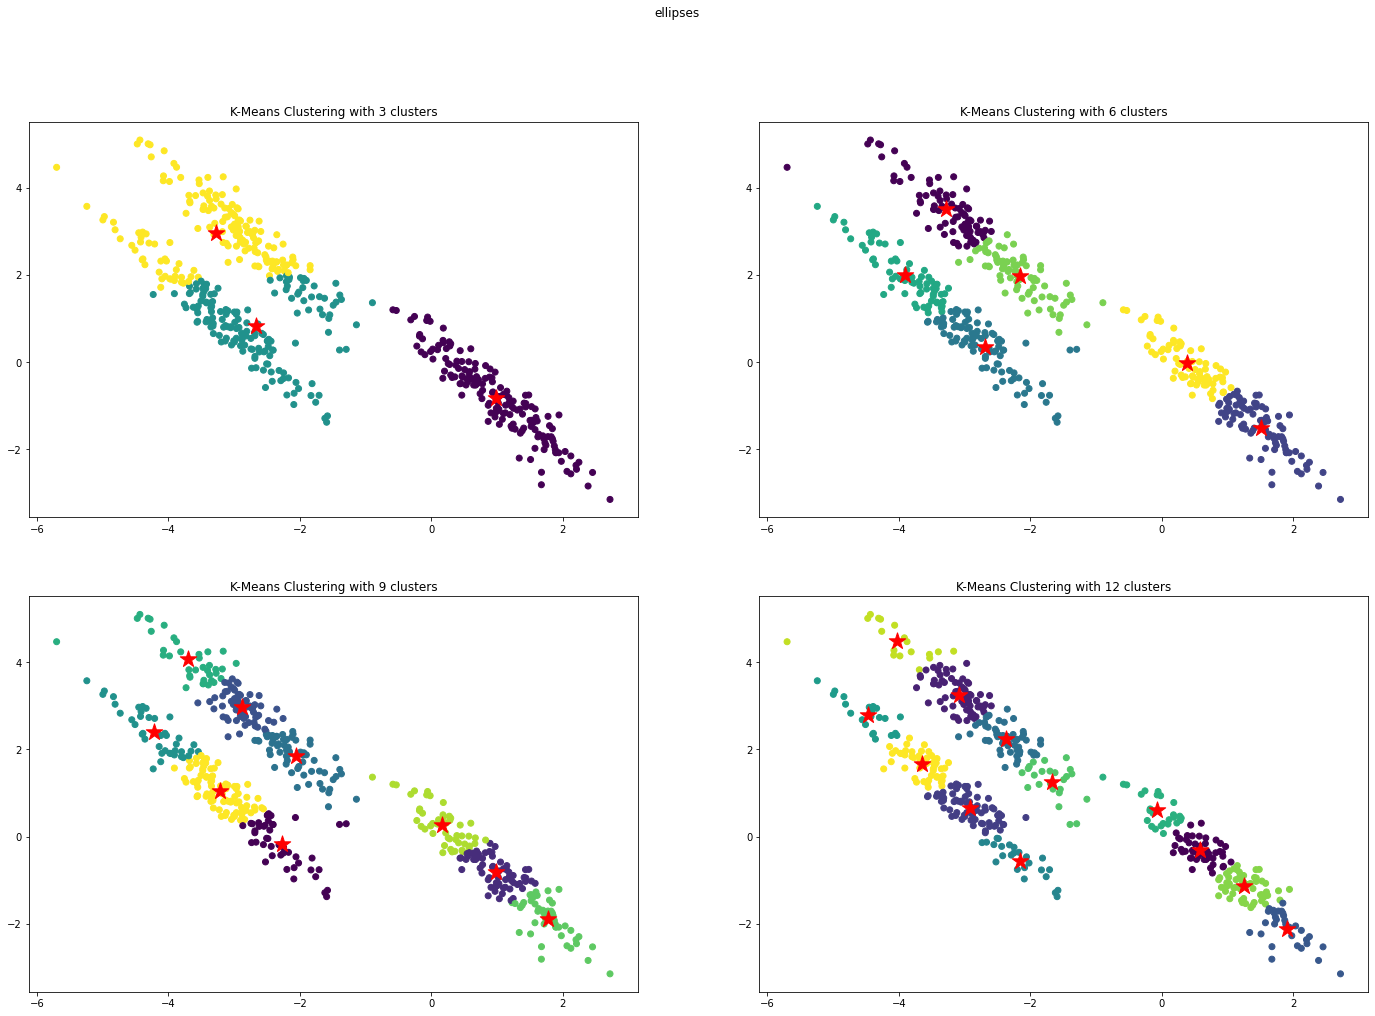

In [118]:
clusters = [3, 6, 9, 12]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(2, 2, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, n_clusters in enumerate(clusters):
        ax = axs[j // 2, j % 2]
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(df)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        ax.scatter(df['x'], df['y'], c=labels)
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
        ax.set_title(f'K-Means Clustering with {n_clusters} clusters')

In [119]:
from sklearn.cluster import DBSCAN

def dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X['x'], X['y'], c=labels)
    plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
    plt.show()

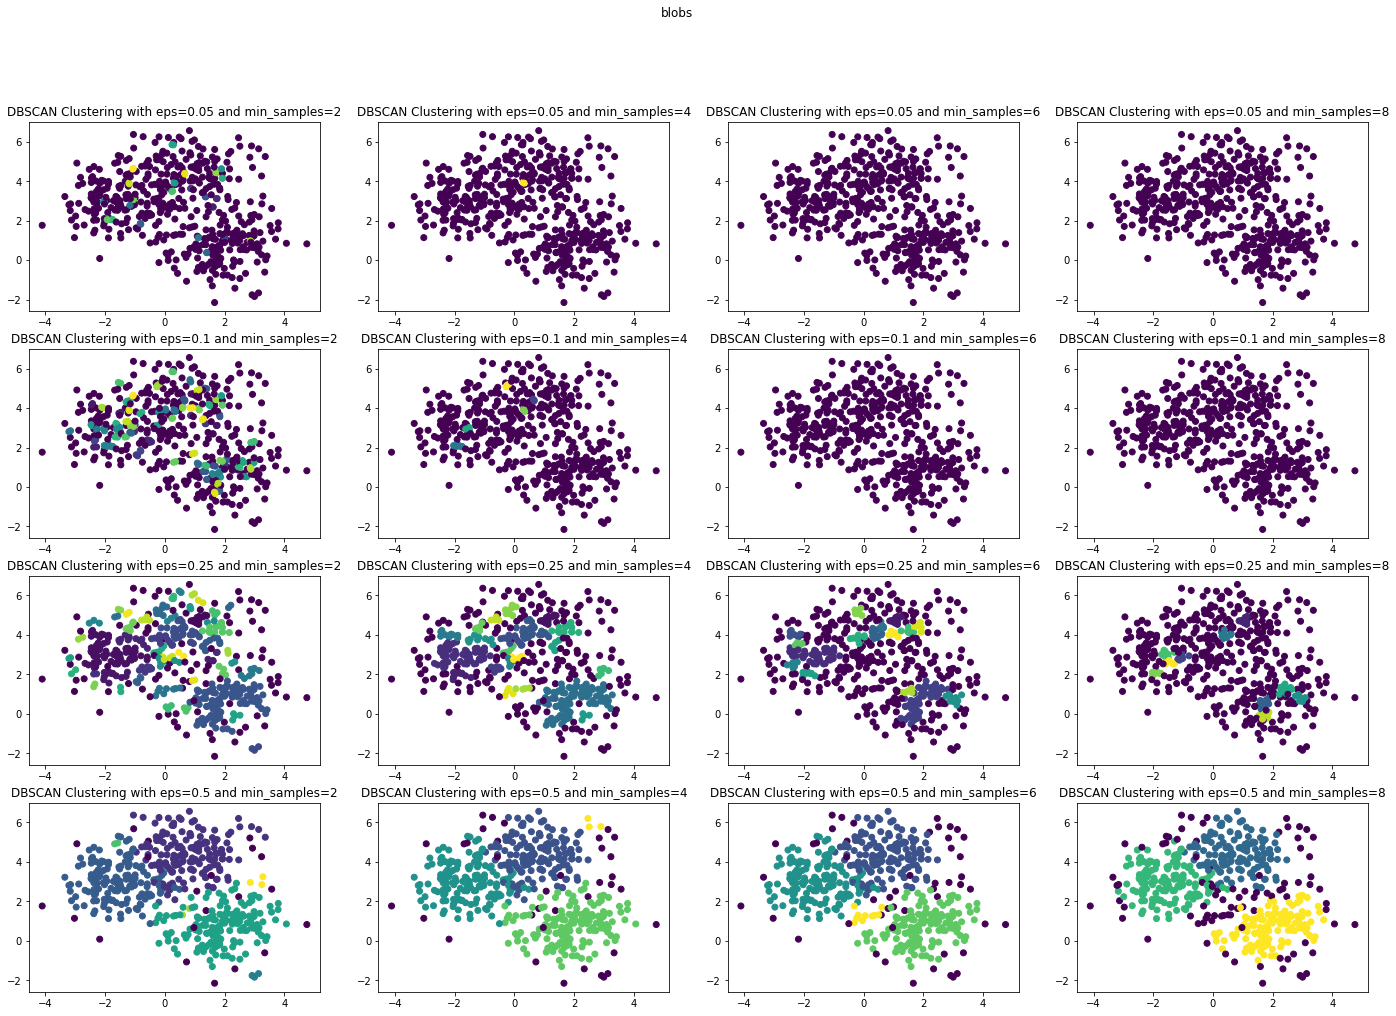

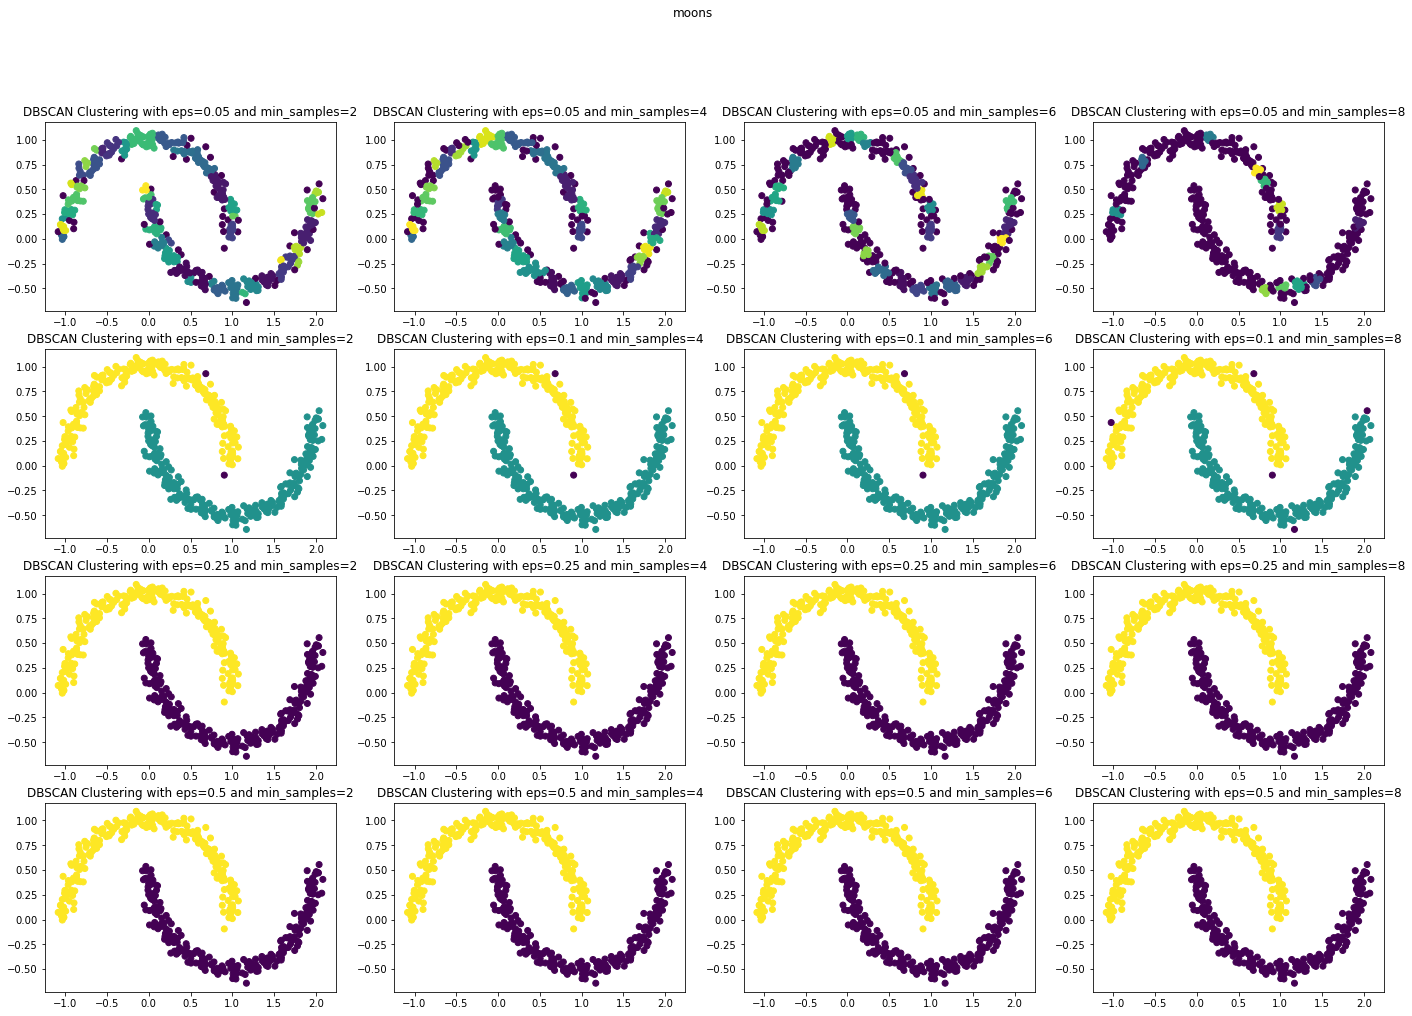

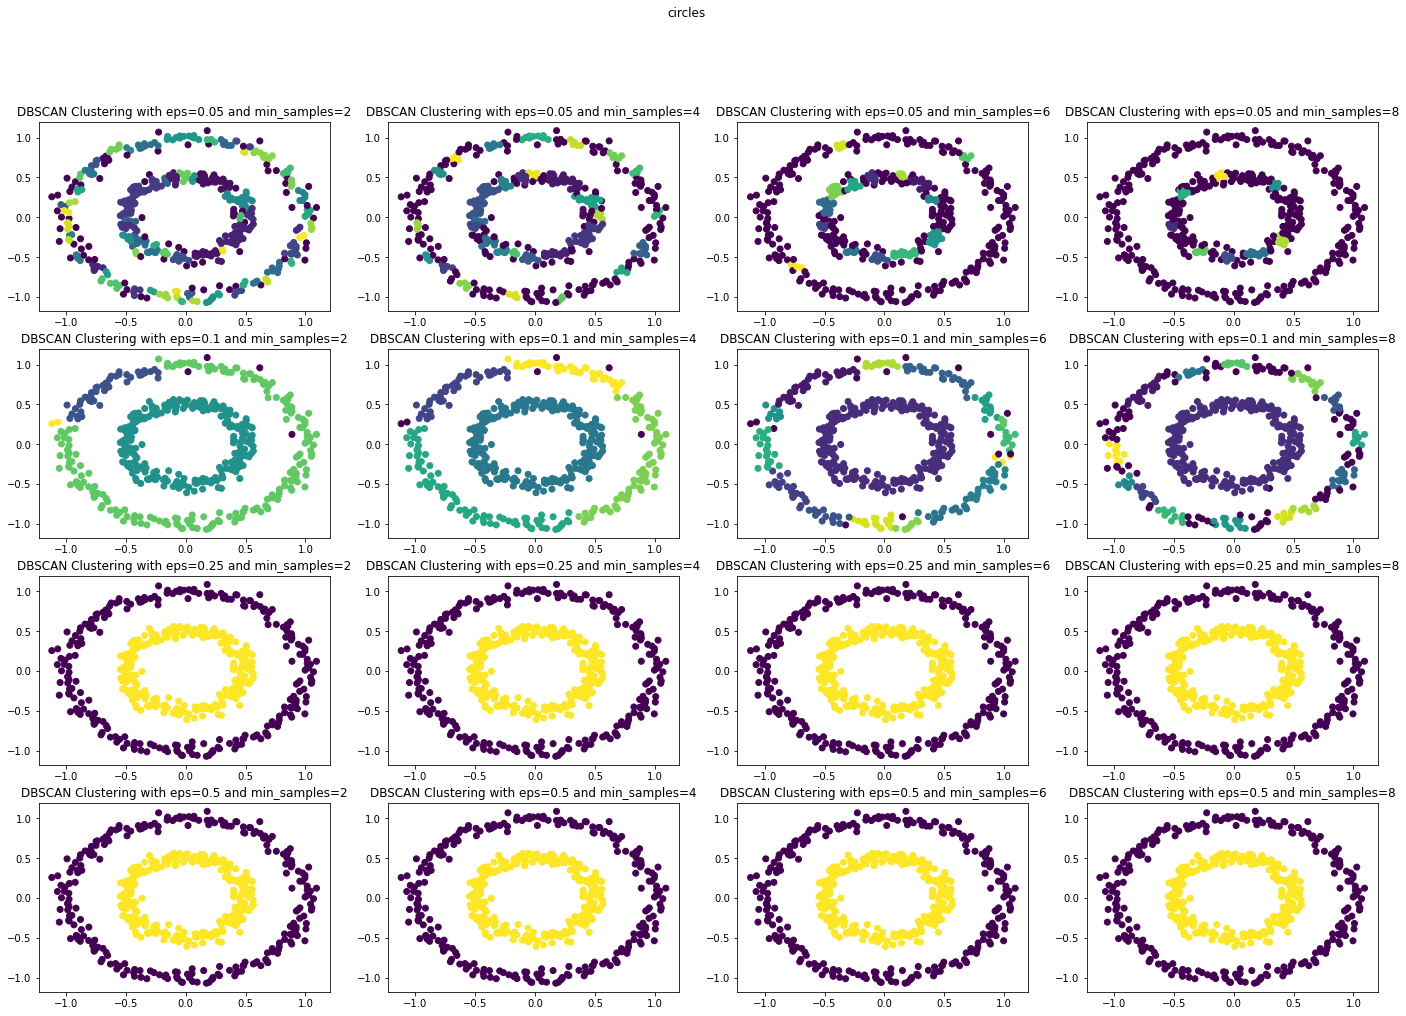

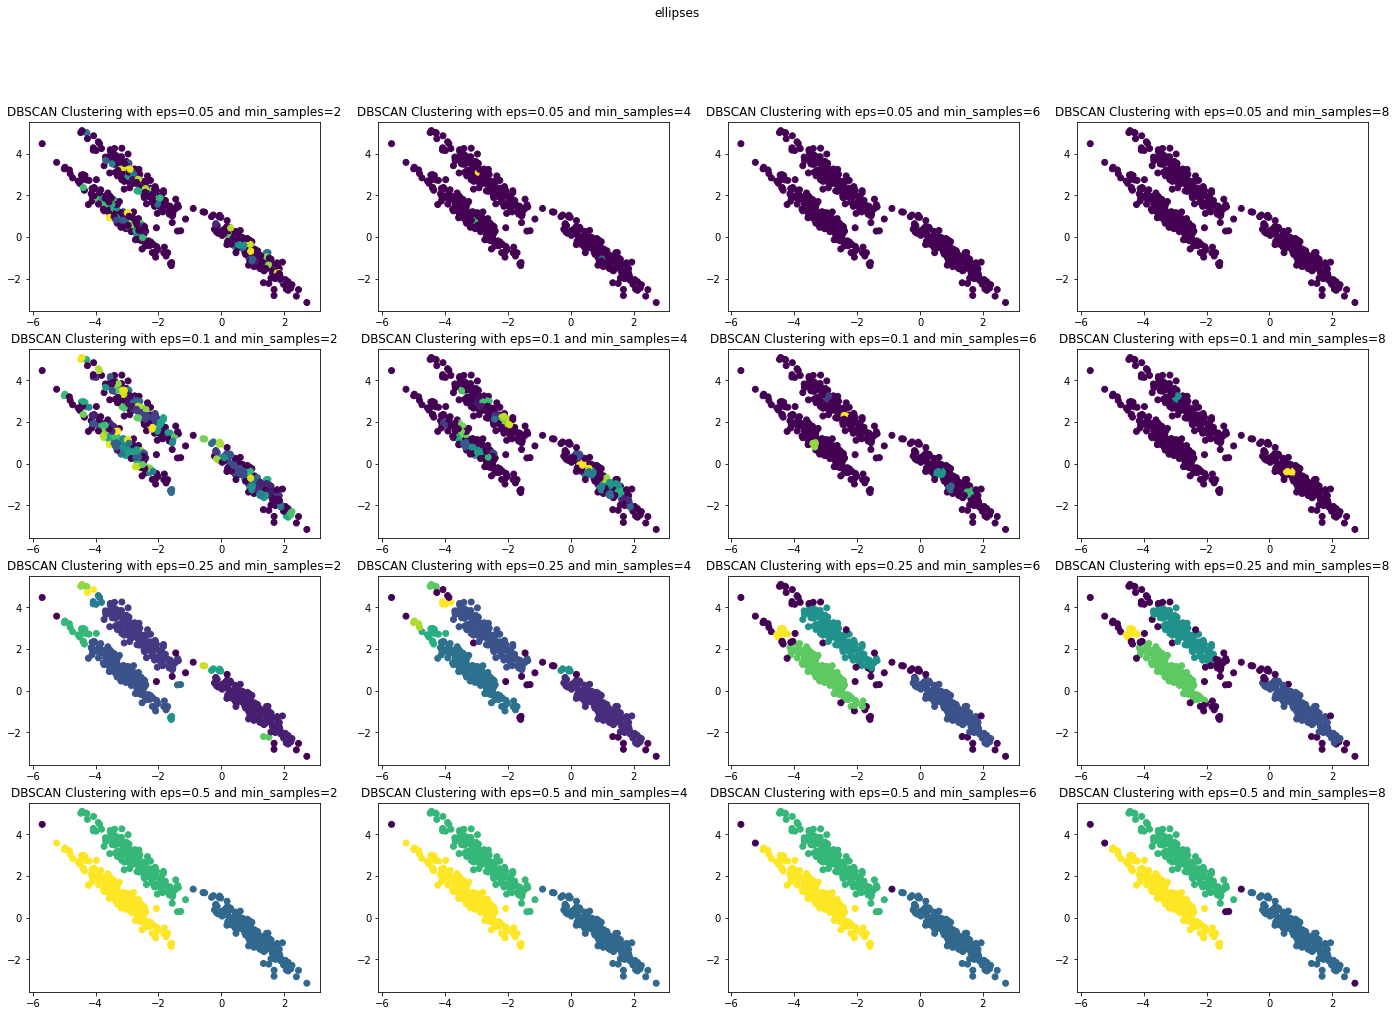

In [120]:
eps_list = [0.05, 0.1, 0.25, 0.5]
min_samples_list = [2, 4, 6, 8]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(4, 4, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, eps in enumerate(eps_list):
        for k, min_samples in enumerate(min_samples_list):
            ax = axs[j, k]
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df)
            labels = dbscan.labels_
            
            ax.scatter(df['x'], df['y'], c=labels)
            ax.set_title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')

**ZAD 2**

In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [122]:
def extract_columns_and_data(content: str):
    lines = content.split('\n')
    
    column_names = []
    data = []
    
    for line in lines:
        if line.startswith("@ATTRIBUTE"):
            column = line.split()[1].strip()
            column_names.append(column)
        elif not line.startswith(("@RELATION", "@DATA", "%")) and line != '' :
            data.append(list(map(float, line.split(','))))
    
    return column_names, data

In [123]:
data_path = "dataset/banknotes.csv"

with open(data_path, 'r') as f:
    content = f.read()
    column_names, data = extract_columns_and_data(content)

df = pd.DataFrame(data, columns=column_names)

In [124]:
df.head()

,counterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0.0,214.8,131.0,131.1,9.0,9.7,141.0
1,0.0,214.6,129.7,129.7,8.1,9.5,141.7
2,0.0,214.8,129.7,129.7,8.7,9.6,142.2
3,0.0,214.8,129.7,129.6,7.5,10.4,142.0
4,0.0,215.0,129.6,129.7,10.4,7.7,141.8


In [125]:
features = ['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

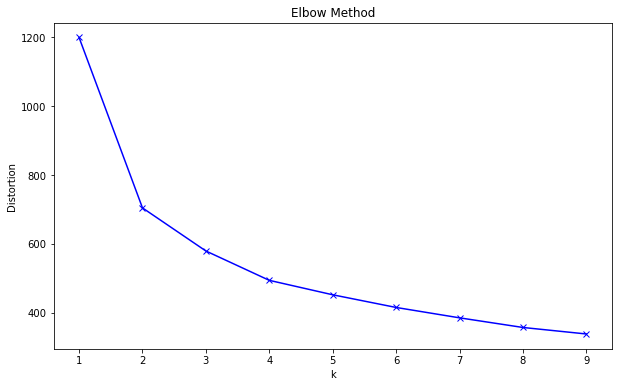

In [126]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    distortions.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

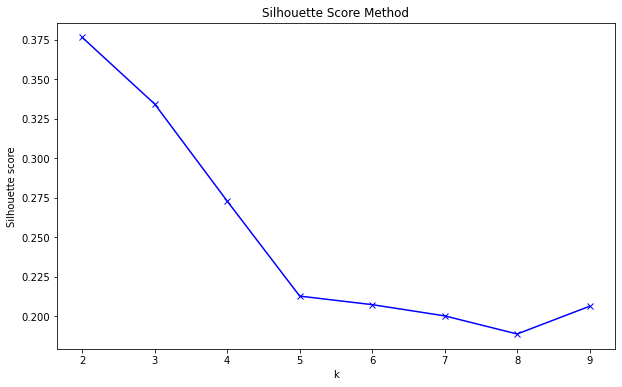

In [127]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans_model.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method')
plt.show()

In [128]:
optimal_k = 2
kmeans_model = KMeans(n_clusters=optimal_k, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

In [129]:
dbscan_model = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

assigned_samples = np.sum(dbscan_labels != -1)
total_samples = len(X_scaled)
print(f"Assigned samples: {assigned_samples}/{total_samples}")

Assigned samples: 196/200


In [131]:
kmeans_results = pd.DataFrame({'Original': df['counterfeit'], 'k-means': kmeans_labels})
dbscan_results = pd.DataFrame({'Original': df['counterfeit'], 'DBSCAN': dbscan_labels})

print(kmeans_results.groupby(['Original', 'k-means']).size())
print(dbscan_results.groupby(['Original', 'DBSCAN']).size())

Original  k-means
0.0       0           92
          1            8
1.0       1          100
dtype: int64
Original  DBSCAN
0.0       -1         2
           0        98
1.0       -1         2
           0        98
dtype: int64


In [135]:
true_labels = df['counterfeit']

kmeans_homogeneity = metrics.homogeneity_score(true_labels, kmeans_labels)
kmeans_completeness = metrics.completeness_score(true_labels, kmeans_labels)
kmeans_vmeasure = metrics.v_measure_score(true_labels, kmeans_labels)

dbscan_homogeneity = metrics.homogeneity_score(true_labels, dbscan_labels)
dbscan_completeness = metrics.completeness_score(true_labels, dbscan_labels)
dbscan_vmeasure = metrics.v_measure_score(true_labels, dbscan_labels)